# Phone-Plan-Recommender
---
Mobile carrier Megaline has found out that many of their subscribers use legacy plans. They want to develop a model that would analyze subscribers' behavior and recommend one of Megaline's newer plans: Smart or Ultra. In this notebook, multiple models are trained and tested in order to determine which will have the highest accuracy for this task.  In this project, the threshold for accuracy is 0.75. 

The following Scikit-Learn models will be tested:
- Logistic Regression
- Decision Trees
- Random Forest 


A "sanity check" will also be performed. An accuracy score will be determined for the baseline of just predicting randomly. That score, which represents random chance, should be surpassed by the trained models and provides a valuable reference point for evaluation. 

### Set Up
---

In [1]:
# Install Necessary Packages 

# Data Prep Packages 
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Models 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

# Model Assessment Package 
from sklearn.metrics import accuracy_score

# Visualization package 
import matplotlib.pyplot as plt

In [2]:
# Load in data 
try:
    # Attempt to read the data
    df = pd.read_csv('/datasets/users_behavior.csv')
    # If successful, print Confirmation
    print("The data has been read in as df.")
except Exception as e:
    # If an error occurs, print an error message
    print("Error reading data:", e)
    print("To get all project files please visit https://github.com/le-crupi64/Phone-Plan-Recommender")

The data has been read in as df.


In [3]:
# Assess data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [4]:
df.duplicated().sum()

0

### Preparing the data
---
The data has already been cleaned: there are no null values or duplicated rows and all columns are the appropriate data type. The following steps will be taken to prepare the data to be used with the models:
1. Split the data into training(60% of data) validating(20% of data), and testing(20% of data) data sets 
2. Split all three sets into features and target. The is_ultra column is the target and the other columns are the features. 

In [5]:
# Split the data into training, validation, and test sets
df_train_valid, df_test = train_test_split(df, test_size=0.2, random_state=12345)
df_train, df_valid = train_test_split(df_train_valid, test_size=0.25, random_state=12345)  # 0.25 x 0.8 = 0.2 (20%)

# Split the training set into features and target
features_train = df_train.drop(['is_ultra'], axis=1)
target_train = df_train['is_ultra']

# Split the Validation set into features and target
features_valid = df_valid.drop(['is_ultra'], axis=1)
target_valid = df_valid['is_ultra']

# Split the Test Set
features_test = df_test.drop(['is_ultra'], axis=1)
target_test = df_test['is_ultra']

### Sanity Check: Establishing the Baseline of Chance 
---
The is_ultra target is a boolean value, so a random classifier baseline will be established. The accuracy score will be determined for chance predictions, providing an additional metric for assessing models. 

In [6]:

# Calculate class distribution from the training set
class_distribution = target_train.value_counts(normalize=True).values

# Generate random predictions for the validation set based on the class distribution
num_instances_valid = len(target_valid)
random_predictions_valid = np.random.choice([0, 1], size=num_instances_valid, p=class_distribution)

# Calculate accuracy of the random predictions
accuracy_valid = accuracy_score(target_valid, random_predictions_valid)
print("Random Classifier Baseline Accuracy on Validation Set:", accuracy_valid)

# Initialize results dictionary 
results = {'model': ['Sanity Check', 'Logistic Regression','Decision Tree', 'Random Forest'],
           'accuracy_score': [0, 0, 0, 0]}

# Add Sanity Check Accuracy to results 
results['accuracy_score'][0] = accuracy_valid

Random Classifier Baseline Accuracy on Validation Set: 0.5660964230171073


### Logistic Regression 
---


In [7]:
# Set Up Model
model = LogisticRegression(random_state=12345, solver='liblinear')

# train model on training set
model.fit(features_train, target_train)  

# Generate predictions for training and validation sets
predictions_train = model.predict(features_train)
predictions_valid = model.predict(features_valid)

# Calculate accuracy scores using accuracy_score()
accuracy_train = accuracy_score(target_train, predictions_train)
accuracy_valid = accuracy_score(target_valid, predictions_valid)

# Get the predictions and accuarcy score for the testing set 
predictions_test = model.predict(features_test)
accuracy_test = accuracy_score(target_test, predictions_test)

print("Accuracy of the logistic regression model on the training set:", accuracy_train)
print("Accuracy of the logistic regression model on the validation set:", accuracy_valid)
print("Accuracy of the logistic regression model on the test set:", accuracy_test)

# Add Accuracy scores to results
results['accuracy_score'][1] = accuracy_test



Accuracy of the logistic regression model on the training set: 0.7422199170124482
Accuracy of the logistic regression model on the validation set: 0.7293934681181959
Accuracy of the logistic regression model on the test set: 0.7511664074650077


**Results Overview**

The accuracy for the training set is approximately 74% and the accuracy for the validation set is approximately 72%. Both of these values fall short of the .75 threshold for accuracy established for this project. The accuracy score for the test set is 0.75115, or approximately 75%. This model was more accurate than the sanity check by 0.18506998444, or approximately 19%. 

### Decision Tree
---

In [13]:
# Initialize variables to hold info on the model with the highest accuracy
best_model = None
accuracy_best = 0
best_depth = 0

# Loop through various max depths to establish which produces the model with the highest accuracy 
for depth in range(1, 10):
	model = DecisionTreeClassifier(random_state=12345, max_depth= depth)
	
	# train the model
	model.fit(features_train, target_train)
	# get the model's predictions
	predictions_valid = model.predict(features_valid) 
	predictions_train = model.predict(features_train)
	# calculate the accuracy
	accuracy_train = accuracy_score(target_train, predictions_train)
	result = accuracy_score(target_valid, predictions_valid) 

	# Compare new accuracy to previous highest accuracy
	if result > accuracy_best:
		best_model = model
		accuracy_best = result
		best_depth = depth
        
print("Accuracy of the best Decision Tree model on the training set: ", accuracy_train)
print("Accuracy of the best Decision Tree model on the validation set: ", accuracy_best)
print("The Decision Tree model with the highest accuracy had a max depth of: ", best_depth)

# Get the predictions and accuarcy score for the testing set 
predictions_test = best_model.predict(features_test)
accuracy_test = accuracy_score(target_test, predictions_test)

print("Accuracy of the decision tree model on the test set:", accuracy_test)

# Add highest Accuracy score to results
results['accuracy_score'][2] = accuracy_test


Accuracy of the best Decision Tree model on the training set:  0.875
Accuracy of the best Decision Tree model on the validation set:  0.7744945567651633
The Decision Tree model with the highest accuracy had a max depth of:  7
Accuracy of the decision tree model on the test set: 0.7884914463452566


***Results Overview***

The model performs better on the training set (accuracy of 0.875) compared to the validation set (accuracy of 0.77449). This suggests slight overfitting. The accuracy score for the model on the test set was  0.7884914463452566, or approximately 79%. All accuracies exceed the  .75 threshold for accuracy established for this project. This model was more accurate than the sanity check by 0.0.22239502332, or approximately 22%. The model with the highest accuracy has a maximum depth of 7. This suggests that the model is relatively complex, as it has a depth of 7 in its decision tree structure.

### Random Forest 
---

In [14]:
# Initialize variables to hold info on the model with the highest accuracy
best_model = None
accuracy_best = 0
best_depth = 0

# Loop through various max depths to establish which produces the model with the highest accuracy 
for est in range(1, 10):
	model = RandomForestClassifier(random_state=12345, n_estimators=est)
	
	# train the model
	model.fit(features_train, target_train)
	# get the model's predictions
	predictions_valid = model.predict(features_valid) 
	predictions_train = model.predict(features_train)
	# calculate the accuracy
	accuracy_train = accuracy_score(target_train, predictions_train)
	result = accuracy_score(target_valid, predictions_valid) 

	# Compare new accuracy to previous highest accuracy
	if result > accuracy_best:
		best_model = model
		accuracy_best = result
		best_depth = depth
        
print("Accuracy of the best random forrest model on the training set: ", accuracy_train)
print("Accuracy of the best random forrest model on the validation set: ", accuracy_best)
print("The random forrest model with the highest accuracy had a max depth of: ", best_depth)

# Get the predictions and accuarcy score for the testing set 
predictions_test = best_model.predict(features_test)
accuracy_test = accuracy_score(target_test, predictions_test)

print("Accuracy of the random forest model on the test set:", accuracy_test)

# Add highest Accuracy score to results
results['accuracy_score'][3] = accuracy_test


Accuracy of the best random forrest model on the training set:  0.9818464730290456
Accuracy of the best random forrest model on the validation set:  0.7869362363919129
The random forrest model with the highest accuracy had a max depth of:  9
Accuracy of the random forest model on the test set: 0.776049766718507


***Results Overview***

The model performs better on the training set (accuracy of 0.98) compared to the validation set (accuracy of 0.786). The accuracy score for the test set was  0.776049766718507, or approximately 78%.  This suggests overfitting. Both accuracies exceed the  .75 threshold for accuracy established for this project. This model was more accurate than the sanity check by 0.2099533437, or approximately 21%. The model with the highest accuracy has a maximum depth of 9. This suggests that the model is relatively complex.

### Conclusion
---

In [15]:
# Convert the results dictionary to a DataFrame with specified column names
df_results = pd.DataFrame(results)

# Print Results df 
df_results

,model,accuracy_score
0,Sanity Check,0.566096
1,Logistic Regression,0.751166
2,Decision Tree,0.788491
3,Random Forest,0.776050


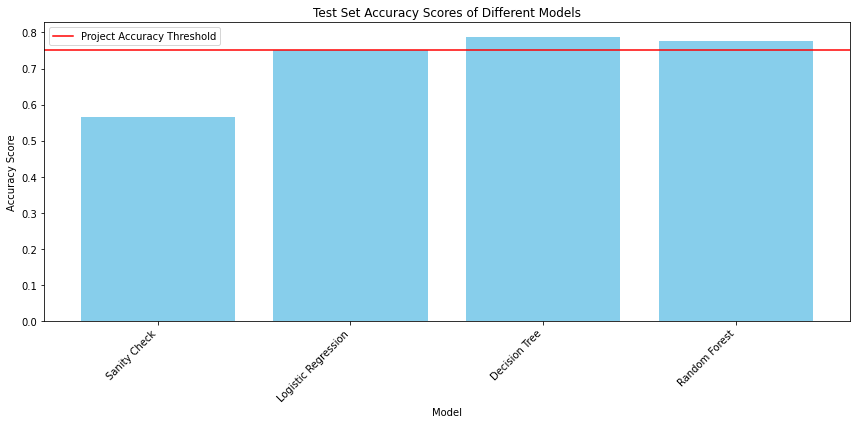

In [17]:
# Plot df_results
plt.figure(figsize=(12, 6))
plt.bar(df_results['model'], df_results['accuracy_score'], color='skyblue')

# Add Chart Labels
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.title('Test Set Accuracy Scores of Different Models')
plt.xticks(rotation=45, ha='right')

# Add Accuracy threshold line 
plt.axhline(y=0.75, color='red', linestyle='-', label='Project Accuracy Threshold')

# Display Chart
plt.tight_layout()  
plt.legend()
plt.show()

Based on the provided information, all three models - Logistic Regression, Decision Tree, and Random Forest - have accuracies on both the training and validation sets exceeding the established threshold of 0.75, indicating satisfactory performance. Compared to the sanity check accuracy score, Decision Tree and Random Forest models demonstrate significant improvement, with approximately 22.29% and 20.99% higher accuracy respectively, whereas Logistic Regression shows an improvement of approximately 18.50%. Although the Decision Tree and Random Forest models exhibit slight evidence of overfitting, particularly Random Forest, the Decision Tree model stands out with the highest accuracy and relatively mild signs of overfitting. Therefore, considering both accuracy and generalization performance, the Decision Tree model is recommended for further use. In testing, it was determined that the max depth of seven yields the highest accuracy score from the Decision Tree model. 